In [1]:
# %pip install pandas
# %pip install matplotlib
# %pip install statsmodels
# %pip install scikit-learn
%pip install prophet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


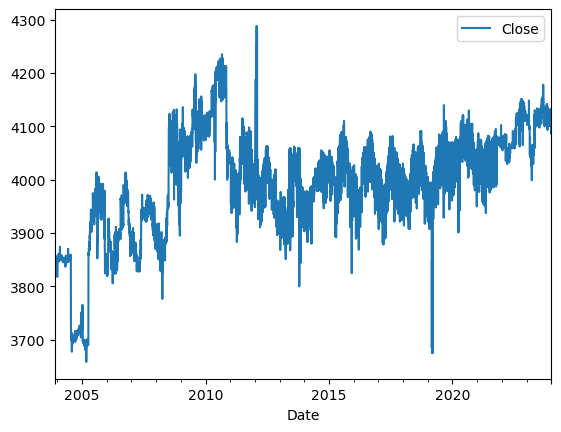

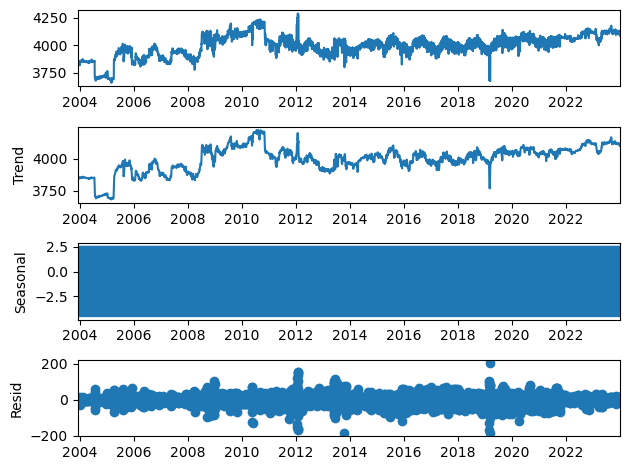

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 7336
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -34316.842
Date:                Wed, 14 Aug 2024   AIC                          68645.683
Time:                        22:34:51   BIC                          68687.086
Sample:                    12-01-2003   HQIC                         68659.916
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5147      0.005   -100.484      0.000      -0.525      -0.505
ar.L2         -0.3896      0.007    -59.777      0.000      -0.402      -0.377
ar.L3         -0.3043      0.006    -47.787      0.0

22:34:58 - cmdstanpy - INFO - Chain [1] start processing
22:35:05 - cmdstanpy - INFO - Chain [1] done processing


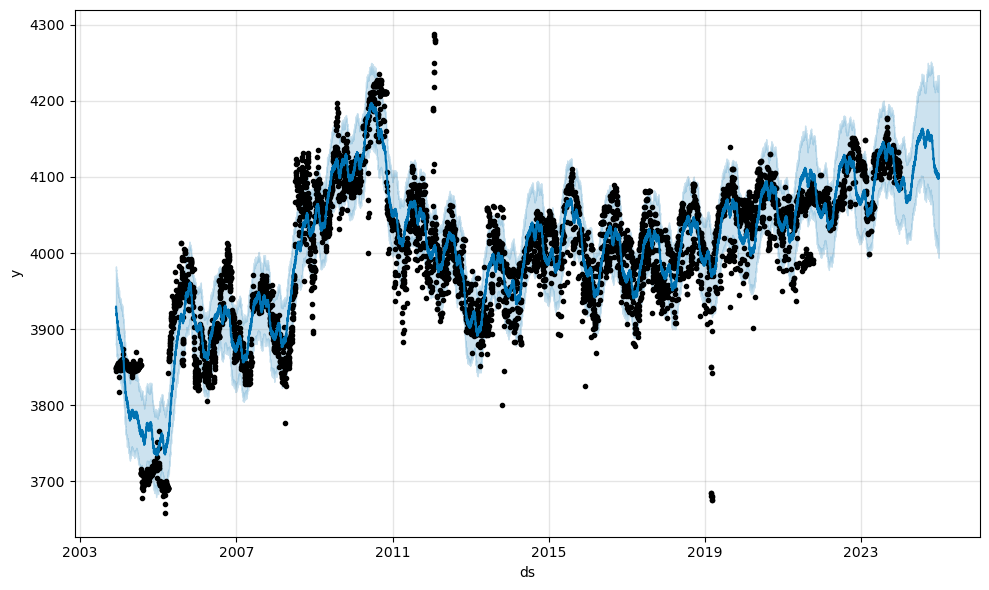

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from prophet import Prophet # type: ignore

# Load data
data = pd.read_csv('usd-khr.csv', index_col='Date', parse_dates=True, dayfirst=True)

# Ensure the Date column is a DatetimeIndex with a frequency
data.index = pd.to_datetime(data.index)
data = data.asfreq('D')

# Fill or interpolate missing values
data = data.interpolate(method='linear')

# Visualization
data.plot()
plt.show()

# Decomposition
decomposition = seasonal_decompose(data, model='additive')
decomposition.plot()
plt.show()

# ARIMA model
model = ARIMA(data, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

# Forecasting with ARIMA
forecast = model_fit.forecast(steps=365)
print(forecast)

# Prophet model
prophet_data = data.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
model = Prophet()
model.fit(prophet_data)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
model.plot(forecast)
plt.show()